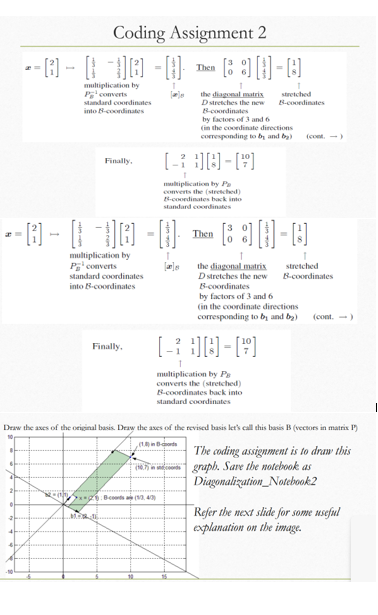

In [7]:
from IPython.display import Image
path=r"C:\Users\MUTHU SELVI\Pictures\dia2.png"
Image(path)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

> diagonalization function

    - diagonalize(A) calculates the eigenvalues and eigenvectors of matrix A.
    - Constructs a diagonal matrix D from the eigenvalues.
    - Adjusts the eigenvectors to form the matrix P and calculates its inverse P_inv.


In [9]:
# Function to diagonalize matrix A
def diagonalize(A):
    # Calculate eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A)

    # Construct the diagonal matrix D
    D = np.diag(eigenvalues)

    # Adjusting the columns of P
    mult1 = -1 / eigenvectors.T[0][1]
    vect1 = mult1 * eigenvectors.T[0]
    mult2 = 1 / eigenvectors.T[1][1]
    vect2 = mult2 * eigenvectors.T[1]

    # Stack the eigenvectors as columns to form the matrix P
    P = np.column_stack((vect1, vect2))
    P_inv = np.linalg.inv(P)

    return P, D, P_inv

> plotting function

    - plot_graph(P, P1, D, x) plots the vectors and transformations.
    - Transforms the vector x to the basis defined by the eigenvectors.
    - Stretches x by the eigenvalues.
    - Converts the stretched vector back to the original coordinate system.
    - Plots the original basis vectors, the transformed vectors, and the stretched vectors.
    - Annotates the plot for clarity and displays it.


In [10]:
# Function to plot the graph
def plot_graph(P, P1, D, x):
    start = np.array([0, 0])  # Start point

    # Define ending points for arrows as NumPy arrays
    end_b1 = np.array([2, -1])   # (2, -1)
    end_b2 = np.array([1, 1])    # (1, 1)

    # Transformations
    x_b = np.dot(P1, x)  # x on b (1/3,4/3)
    stretched_x = np.dot(D, x_b) # stretched x (1,8)
    std_coords = np.dot(P, stretched_x) # std coords (10,7)

    std_stretched_x_along_b2 = end_b2 * stretched_x[1]  # (8, 8)
    std_stretched_x_along_b1 = end_b1 * stretched_x[0]  # (2, -1)
    x_along_b2 = end_b2 * x_b[1]
    x_along_b1 = end_b1 * x_b[0]

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot arrows
    ax.plot([std_stretched_x_along_b2[0]-0.3, 15 * end_b2[0]], [std_stretched_x_along_b2[1]-0.3, 15 * end_b2[1]], color='black')
    ax.plot([0, -11 * end_b2[0]], [0, -11 * end_b2[1]], color='black')
    ax.plot([end_b1[0]-start[0]-0.3, 10 * end_b1[0]], [end_b1[1]-start[1]+0.03, 10 * end_b1[1]], color='black')
    ax.plot([0, -4 * end_b1[0]], [0, -4 * end_b1[1]], color='black')

    ax.plot([std_stretched_x_along_b2[0], std_coords[0]], [std_stretched_x_along_b2[1], std_coords[1]], color='black')
    ax.plot([std_stretched_x_along_b1[0], std_coords[0]], [std_stretched_x_along_b1[1], std_coords[1]], color='black')
    ax.arrow(*start, end_b1[0]-start[0]-0.3, end_b1[1]-start[1]+0.03, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.arrow(*start, end_b2[0]-start[0]-0.3, end_b2[1]-start[1]-0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    ax.scatter(end_b1[0], end_b1[1], color='green')
    ax.scatter(end_b2[0], end_b2[1], color='green')
    ax.scatter(x[0], x[1], color='green')
    ax.scatter(std_coords[0], std_coords[1], color='green')
    ax.arrow(*(end_b2[0], end_b2[1]), std_stretched_x_along_b2[0]-end_b2[0]-0.3, std_stretched_x_along_b2[1]-end_b2[1]-0.3, head_width=0.3, head_length=0.3, fc='green', ec='green')

    ax.arrow(*(x_along_b1[0], x_along_b1[1]), x[0]-(x_along_b1[0]), x[1]-(x_along_b1[1]), head_width=0, head_length=0, fc='gray', ec='gray')
    ax.arrow(*(x_along_b2[0], x_along_b2[1]), x[0]-(x_along_b2[0]), x[1]-(x_along_b2[1]), head_width=0, head_length=0, fc='gray', ec='gray')

    # Add labels near the arrow heads
    ax.annotate(f'b1 = {end_b1}', xy=(end_b1[0]+1, end_b1[1]-1.01), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'b2 = {end_b2}', xy=(end_b2[0]-1, end_b2[1]-0.5), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'x = {x};  {np.round(x_b,2)}', xy=(x[0], x[1]), xytext=(5, -5), textcoords='offset points')
    ax.annotate(f'{stretched_x} \n {std_coords}', xy=(std_coords[0], std_coords[1]), xytext=(5, -5), textcoords='offset points')

    # Set limits and labels
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show plot
    plt.grid()
    plt.show()

    print("x_b:", x_b)
    print("stretched_x:", stretched_x)
    print("std_coords:", std_coords)
    print("std_stretched_x_along_b2:", std_stretched_x_along_b2)
    print("std_stretched_x_along_b1:", std_stretched_x_along_b1)
    print("x_along_b2:", x_along_b2)
    print("x_along_b1:", x_along_b1)

> main funtion

    - Defines the matrix A.
    - Diagonalizes A to get P, D, and P1.
    - Defines a vector x.
    - Plots the transformations and prints the coordinates of the transformed vectors.


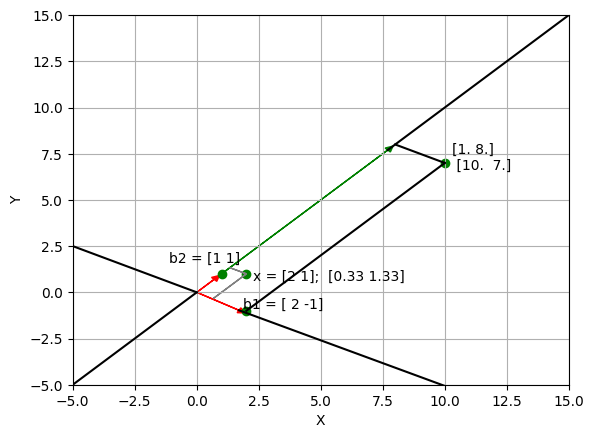

x_b: [0.33333333 1.33333333]
stretched_x: [1. 8.]
std_coords: [10.  7.]
std_stretched_x_along_b2: [8. 8.]
std_stretched_x_along_b1: [ 2. -1.]
x_along_b2: [1.33333333 1.33333333]
x_along_b1: [ 0.66666667 -0.33333333]


In [11]:

# Define the matrix A
A = np.array([[4, 2],
              [1, 5]])

# Diagonalize the matrix
P, D, P1 = diagonalize(A)

# Define the vector x
x = np.array([2, 1])

# Plot the graph
plot_graph(P, P1, D, x)
